# Introduction to TensorFlow


In [ ]:
# !pip install --upgrade tensorflow

In [ ]:
# %tensorflow_version 1.x
# !pip install numpy==1.19.5

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.8.0'

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape

11501568/11490434 [==============================] - 8s 1us/step


(60000, 28, 28)

label =  2


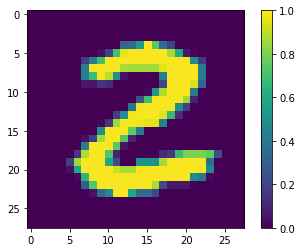

In [5]:
import matplotlib.pyplot as plt
# %matplotlib inline #in case of jupyter notbook
m = 25
plt.figure()
plt.imshow(x_train[m])
print('label = ', y_train[m])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2227 - accuracy: 0.9336
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0997 - accuracy: 0.9696
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0673 - accuracy: 0.9790
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0549 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0418 - accuracy: 0.9865


In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0628 - accuracy: 0.9815


[0.0627753883600235, 0.9815000295639038]

## Creating Tensors

### Constant Tensors

| Name                                                                      | Description                                                               |
| ------------------------------------------------------------------------- | :------------------------------------------------------------------------ |
| [tf.zeros](https://www.tensorflow.org/api_docs/python/tf/zeros)           | Creates a constant tensor of zeros of a given shape and type.             |
| [tf.zeros_like](https://www.tensorflow.org/api_docs/python/tf/zeros_like) | Creates a constant tensor of zeros of the same shape as the input tensor. |
| [tf.ones](https://www.tensorflow.org/api_docs/python/tf/ones)             | Creates a constant tensor of ones of a given shape and type.              |
| [tf.ones_like](https://www.tensorflow.org/api_docs/python/tf/ones_like)   | Creates a constant tensor of ones of the same shape as the input tensor.  |
| [tf.linspace](https://www.tensorflow.org/api_docs/python/tf/linspace)     | Creates an evenly spaced tensor of values between supplied end points.    |

The following example demonstrates some of these ops.


In [11]:
# Create a bunch of zeros of a specific shape and type.
x = tf.zeros([2, 2], dtype=tf.float64)
print("tf.zeros example: %s" % x)

# tf.zeros_like is pretty useful. It creates a zero tensors which is
# shaped like some other tensor you supply.
x = tf.constant([[[1], [2]]])
zeros_like_x = tf.zeros_like(x, dtype=tf.float32)

print("Shape(x) = %s \nShape(zeros_like_x) = %s" %
      (x.shape, zeros_like_x.shape))

tf.zeros example: tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float64)
Shape(x) = (1, 2, 1) 
Shape(zeros_like_x) = (1, 2, 1)


### Random Tensors

| Name                                                                              | Description                                                                        |
| --------------------------------------------------------------------------------- | :--------------------------------------------------------------------------------- |
| [tf.random.normal](https://www.tensorflow.org/api_docs/python/tf/random/normal)   | Generates a constant tensor with independent normal entries.                       |
| [tf.random.uniform](https://www.tensorflow.org/api_docs/python/tf/random/uniform) | Generates a constant tensor with uniformly distributed elements.                   |
| [tf.random.gamma](https://www.tensorflow.org/api_docs/python/tf/random/gamma)     | Generates a constant tensor with gamma distributed elements.                       |
| [tf.random.shuffle](https://www.tensorflow.org/api_docs/python/tf/random/shuffle) | Takes an input tensor and randomly permutes the entries along the first dimension. |


In [12]:
# Create a matrix with normally distributed entries.
x = tf.random.normal([1, 3], mean=1.0, stddev=4.0, dtype=tf.float64)
print("A random normal tensor: %s" % x)

# Randomly shuffle the first dimension of a tensor.
r = tf.random.shuffle([1, 2, 3, 4])
print("Random shuffle of [1,2,3,4]: %s" % r)

A random normal tensor: tf.Tensor([[ 4.45850738 -1.69921925  1.90200974]], shape=(1, 3), dtype=float64)
Random shuffle of [1,2,3,4]: tf.Tensor([2 3 4 1], shape=(4,), dtype=int32)


## Maths Ops

- There is a whole suite of commonly needed math ops built in.
- The inline form of the op allows you to e.g. write x + y instead of tf.add(x, y).

| Name                                                                            | Description                                     | Inline form |
| ------------------------------------------------------------------------------- | ----------------------------------------------- | ----------- |
| [tf.math.add](https://www.tensorflow.org/api_docs/python/tf/math/add)           | Adds two tensors element wise                   | +           |
| [tf.math.subtract](https://www.tensorflow.org/api_docs/python/tf/math/subtract) | Subtracts two tensors element wise              | -           |
| [tf.math.multiply](https://www.tensorflow.org/api_docs/python/tf/math/multiply) | Multiplies two tensors element wise             | \*          |
| [tf.math.divide](https://www.tensorflow.org/api_docs/python/tf/math/divide)     | Divides two tensors element wise                | /           |
| [tf.math.mod](https://www.tensorflow.org/api_docs/python/tf/math/floormod)      | Computes the remainder of division element wise | %           |

- Note that the behaviour of "/" and "//" varies depending on python version and presence of `from __future__ import division`, to match how division behaves with ordinary python scalars.
- The following table lists some more commonly needed functions:

| Name                                                                          | Description                                   |
| ----------------------------------------------------------------------------- | --------------------------------------------- |
| [tf.math.exp](https://www.tensorflow.org/api_docs/python/tf/math/exp)         | The exponential of the argument element wise. |
| [tf.math.log](https://www.tensorflow.org/api_docs/python/tf/math/log)         | The natural log element wise                  |
| [tf.math.sqrt](https://www.tensorflow.org/api_docs/python/tf/math/sqrt)       | Square root element wise                      |
| [tf.math.round](https://www.tensorflow.org/api_docs/python/tf/math/round)     | Rounds to the nearest integer element wise    |
| [tf.math.maximum](https://www.tensorflow.org/api_docs/python/tf/math/maximum) | Maximum of two tensors element wise.          |


## Matrix Ops

- Matrices are rank 2 tensors. There is a suite of ops for doing matrix manipulations.

| Name                                                                                     | Description                                            |
| ---------------------------------------------------------------------------------------- | ------------------------------------------------------ |
| [tf.linalg.matrix_diag](https://www.tensorflow.org/api_docs/python/tf/linalg/diag)       | Creates a tensor from its diagonal                     |
| [tf.linalg.trace](https://www.tensorflow.org/api_docs/python/tf/linalg/trace)            | Computes the sum of the diagonal elements of a matrix. |
| [tf.linalg.matrix_determinant](https://www.tensorflow.org/api_docs/python/tf/linalg/det) | Computes the determinant of a matrix (square only)     |
| [tf.linalg.matmul](https://www.tensorflow.org/api_docs/python/tf/linalg/matmul)          | Multiplies two matrices                                |
| [tf.linalg.matrix_inverse](https://www.tensorflow.org/api_docs/python/tf/linalg/inv)     | Computes the inverse of the matrix (square only)       |


In [13]:
x = tf.random.normal([3, 3], mean=1.0, stddev=4.0, dtype=tf.float64)
y = tf.random.normal([3, 3], mean=1.0, stddev=4.0, dtype=tf.float64)
print("x:", x, "y:", y)

x: tf.Tensor(
[[-6.10988874  4.1972948  -2.41283132]
 [-2.55688825  6.43431039 -2.95908251]
 [ 3.84866811  5.22286637  0.80355727]], shape=(3, 3), dtype=float64) y: tf.Tensor(
[[ 1.76469161 -0.48204672  0.45180124]
 [ 5.93877678  2.97565994 -2.16195988]
 [-6.33887951  4.22078829  6.0229863 ]], shape=(3, 3), dtype=float64)


## Logical And Comparison Ops

- Tensorflow has the full complement of logical operators you would expect.
- These are also overloaded so you can use their inline version.
- The ops most frequently used are as follows:

| Name                                                                                 | Description                           | Inline form |
| ------------------------------------------------------------------------------------ | ------------------------------------- | ----------- |
| [tf.equal](https://www.tensorflow.org/api_docs/python/tf/math/equal)                 | Element wise equality                 | **None**    |
| [tf.less](https://www.tensorflow.org/api_docs/python/tf/math/less)                   | Element wise less than                | <           |
| [tf.less_equal](https://www.tensorflow.org/api_docs/python/tf/math/less_equal)       | Element wise less than or equal to    | <=          |
| [tf.greater](https://www.tensorflow.org/api_docs/python/tf/math/greater)             | Element wise greater than             | >           |
| [tf.greater_equal](https://www.tensorflow.org/api_docs/python/tf/math/greater_equal) | Element wise greater than or equal to | >=          |
| [tf.logical_and](https://www.tensorflow.org/api_docs/python/tf/math/logical_and)     | Element wise And                      | &           |
| [tf.logical_or](https://www.tensorflow.org/api_docs/python/tf/math/logical_or)       | Element wise Or                       | &#124;      |

- Note that tf.equal doesn't have an inline form. Comparing two tensors with == will use the default python comparison. It will **not** call tf.equal.


## Aggregations and Scans

Most of the ops we have seen so far, act on the input tensors in an element wise manner. Another important set of operators allow you to do aggregations on a whole tensor as well as scan the tensor.

- Aggregations (or reductions) act on a tensor and produce a reduced dimension tensor. The main ops here are

| Name                                                                             | Description                                       |
| -------------------------------------------------------------------------------- | ------------------------------------------------- |
| [tf.reduce_sum](https://www.tensorflow.org/api_docs/python/tf/math/reduce_sum)   | Sum of elements along all or some dimensions.     |
| [tf.reduce_mean](https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean) | Average of elements along all or some dimensions. |
| [tf.reduce_min](https://www.tensorflow.org/api_docs/python/tf/math/reduce_min)   | Minimum of elements along all or some dimensions. |
| [tf.reduce_max](https://www.tensorflow.org/api_docs/python/tf/math/reduce_max)   | Maximum of elements along all or some dimensions. |

- and for boolean tensors only

| Name                                                                           | Description                                         |
| ------------------------------------------------------------------------------ | --------------------------------------------------- |
| [tf.reduce_any](https://www.tensorflow.org/api_docs/python/tf/math/reduce_any) | Result of logical OR along all or some dimensions.  |
| [tf.reduce_all](https://www.tensorflow.org/api_docs/python/tf/math/reduce_all) | Result of logical AND along all or some dimensions. |

- Scan act on a tensor and produce a tensor of the same dimension.

| Name                                                                     | Description                                   |
| ------------------------------------------------------------------------ | --------------------------------------------- |
| [tf.cumsum](https://www.tensorflow.org/api_docs/python/tf/math/cumsum)   | Cumulative sum of elements along an axis.     |
| [tf.cumprod](https://www.tensorflow.org/api_docs/python/tf/math/cumprod) | Cumulative product of elements along an axis. |


## Quiz: Normal Density

- In the following mini-codelab, you are asked to compute the normal density using the ops you have seen so far.
- You first generate a sample of points at which you will evaluate the density.
- The points are generated using a normal distribution (need not be the same one whose density you are evaluating).
- This is done by the function **generate_normal_draws** below.
- The function **normal_density_at** computes the density at any given set of points.
- You have to complete the code of these two functions so they work as expected.
- Execute the code and check that the test passes.

### Hints

- Recall that the normal density is given by  
  $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$
- Here $\mu$ is the mean of the distribution and $\sigma > 0$ is the standard deviation.
- Pay attention to the data types mentioned in the function documentations. You should ensure that your implementations respect the data types stated.


In [14]:
#@title Mini-codelab: Compute the normal density.

import numpy as np
import numpy.testing as npt
from scipy import stats


def generate_normal_draws(shape, mean=0.0, stddev=1.0):
  """Generates a tensor drawn from a 1D normal distribution.
  
    Creates a constant tensor of the supplied shape whose elements are drawn
    independently from a normal distribution with the supplied parameters.

    Args:
      shape: An int32 tensor. Specifies the shape of the return value.
      mean: A float32 value. The mean of the normal distribution. 
      stddev: A positive float32 value. The standard deviation of the 
        distribution.

    Returns:
      A constant float32 tensor whose elements are normally distributed.
  """

  # to-do: Complete this function.
  pass


def normal_density_at(x, mean=0.0, stddev=1.0):
  """Computes the normal density at the supplied points.
  
    Args:
      x: A float32 tensor at which the density is to be computed.
      mean: A float32. The mean of the distribution.
      stddev: A positive float32. The standard deviation of the distribution.
      
    Returns:
      A float32 tensor of the normal density evaluated at the supplied points.
  """

  # to-do: Complete this function. As a reminder, the normal density is
  # f(x) = exp(-(x-mu)^2/(2*stddev^2)) / sqrt(2 pi stddev^2).
  # The value of pi can be accessed as np.pi.
  pass


def test():
  mu, sd = 1.1, 2.1
  x = generate_normal_draws([2, 3, 5], mean=mu, stddev=sd)
  pdf = normal_density_at(x)
  npt.assert_array_equal(x.shape, [2, 3, 5], 'Shape is incorrect')
  norm = stats.norm()
  npt.assert_allclose(pdf, norm.pdf(x), atol=1e-6)
  print("All good!")


test()

AttributeError: 'NoneType' object has no attribute 'shape'